# Assignment Week 10 - Tidying and Transforming Data
## Dana Nave

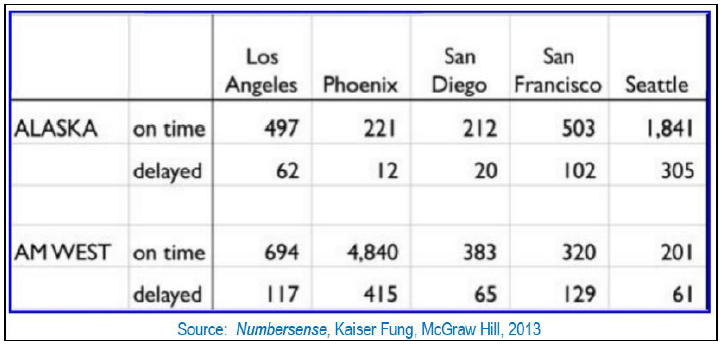

### Requirements:
    1. Create a .CSV file that includes all of the information shown in the above table.
    2. Read your .CSV file from your GitHub repository into a Jupyter Notebook, and use your knowledge of combining and reshaping data in Pandas to tidy and transform your data.
    3. Using your reshaped/transformed data, perform analysis to compare the arrival delays for the two airlines. Two questions you must answer: 
        a. For each city, which airline had the best on time performance? 
        b. Which airline had the best overall on time performance?
    4. Consider what, if any, changes you would make to the visual presentation of the data if you were then asked to transform your “long” data back into a “wide” format: would you mimic the structure of the graphic shown above? If not, how might you transform your “long” data to “wide” format to make its “wide” presentation easier to understand and work with?

#### Requirement #1 & #2 Approach: 
- Creating an excel file similar to the above file was created and saved to my personal computer. A picture of it is attached.
- The file was saved as a CSV and pushed to GitHub.
- Importing the file using the Pandas read_csv function, the URL is the raw version of the file on GitHub.
- Using knowledge to transform the data into a "long", tidy data by arranging the data in the following form:
    - A single observation will include the following information: carrier, destination, flight schedule (on time/delayed)
    - The long format will include the 4 values mentioned in the previous point in order to achieve this result I will change the structure of the table, delete any unnecessary rows, fill in missing information and rename columns.

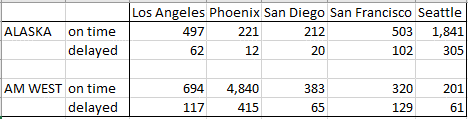

In [231]:
# Import NumPy library
import numpy as np
# Import Pandas library
import pandas as pd
# Load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

In [232]:
# Importing CSV with data and assigning it to the name Airlines
Airlines = pd.read_csv('https://raw.githubusercontent.com/dnave/AIM-5001/master/Airlines.csv') 

# Print table
Airlines

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [233]:
# Understanding the data information to explore if any additional steps are in order
# I can see that the destination columns are floats, I will therefore add an additional step on converting them to integer
# Calling the info function
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2 non-null      object 
 1   Unnamed: 1     4 non-null      object 
 2   Los Angeles    4 non-null      float64
 3   Phoenix        4 non-null      float64
 4   San Diego      4 non-null      float64
 5   San Francisco  4 non-null      float64
 6   Seattle        4 non-null      float64
dtypes: float64(5), object(2)
memory usage: 408.0+ bytes


In [234]:
# Dropping unnecessary row
Airlines= Airlines.drop(Airlines.index[2]) 

# Print table to verify execution of the drop function
Airlines

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [235]:
# Changing title names
Airlines = Airlines.rename(columns={'Unnamed: 0' : 'Carrier', 'Unnamed: 1': 'Flight Schedule'})

# Fill the missing values (NaN) in the Carrier column
Airlines['Carrier'].fillna(method='ffill', inplace = True)

# Print table to verify execution of the function
Airlines

,Carrier,Flight Schedule,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


In [236]:
# Call the melt function to pivot into a long format
Melted = pd.melt(Airlines, ['Carrier','Flight Schedule'])

# Print table to observe new format
Melted

,Carrier,Flight Schedule,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [237]:
# Rename column names after melt function
Melted = Melted.rename(columns={'variable' : 'Destination', 'value': 'Number of Flights'})

# Print to verify results
Melted

,Carrier,Flight Schedule,Destination,Number of Flights
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [238]:
# In the previous print, I noticed that the column "Number of Flights" is a float, therefore convert it into an integer
# Convert the Number of Flights column into an integer
Melted['Number of Flights'] = Melted['Number of Flights'].astype(int)

# Print to verify results
Melted

,Carrier,Flight Schedule,Destination,Number of Flights
0,ALASKA,on time,Los Angeles,497
1,ALASKA,delayed,Los Angeles,62
2,AM WEST,on time,Los Angeles,694
3,AM WEST,delayed,Los Angeles,117
4,ALASKA,on time,Phoenix,221
5,ALASKA,delayed,Phoenix,12
6,AM WEST,on time,Phoenix,4840
7,AM WEST,delayed,Phoenix,415
8,ALASKA,on time,San Diego,212
9,ALASKA,delayed,San Diego,20


In [239]:
# Create a tidy dataframe where an observation has two measures: number of flights by the carrier, flight schedule, and destination

# Call the pivot function to combine common values
Pivot = Melted.pivot_table(index=['Carrier','Destination'],
                             columns='Flight Schedule',
                             values='Number of Flights')

# Print to verify results
Pivot

Flight Schedule        delayed  on time
Carrier Destination                    
ALASKA  Los Angeles         62      497
        Phoenix             12      221
        San Diego           20      212
        San Francisco      102      503
        Seattle            305     1841
AM WEST Los Angeles        117      694
        Phoenix            415     4840
        San Diego           65      383
        San Francisco      129      320
        Seattle             61      201

In [240]:
# Call the sort.values function to arrange the data according to the Destination column and save it to a new DF Tidy
# Tidy is the final DF and follows all of the concepts of the Tidy Data method
Tidy = Pivot.sort_values('Destination')

# Print
Tidy

,Flight Schedule,delayed,on time
Carrier,Destination,,
ALASKA,Los Angeles,62,497
AM WEST,Los Angeles,117,694
ALASKA,Phoenix,12,221
AM WEST,Phoenix,415,4840
ALASKA,San Diego,20,212
AM WEST,San Diego,65,383
ALASKA,San Francisco,102,503
AM WEST,San Francisco,129,320
ALASKA,Seattle,305,1841


##### I now have a Tidy Data tables that follow the concepts of the method. Each row is a unique observation and maintained the information that I aimed to achieve: Carrier, Destination, and Flight Status.

#### Requirement #3 Approach:
        a. For each city, which airline had the best on-time performance? Create a loop to find the city with the best 'on time' performance and plot it into a bar chart to view the differences.
        b. Which airline had the best overall on-time performance? use the groupby() function by the carrier column and summarise the results to get the total number of the performance.

In [241]:
# a.
# Using a loop, calculating the proportion of the flights, saving it to a new column called on_time_performance.
# The loop will execute the following: for each row, search by the Destination column, find the on-time performance, 
# divide the result by the sum of all flight schedules (on time and delayed) and round the result to 2 decimal points. 
for row in range (Tidy.shape[0]):
    Tidy['on_time_performance'] = round(
        Tidy['on time'].astype('int64')/
        Tidy.loc[:,['on time','delayed']].sum(axis=1,skipna = True),2)

# Print results
Tidy

,Flight Schedule,delayed,on time,on_time_performance
Carrier,Destination,,,
ALASKA,Los Angeles,62,497,0.89
AM WEST,Los Angeles,117,694,0.86
ALASKA,Phoenix,12,221,0.95
AM WEST,Phoenix,415,4840,0.92
ALASKA,San Diego,20,212,0.91
AM WEST,San Diego,65,383,0.85
ALASKA,San Francisco,102,503,0.83
AM WEST,San Francisco,129,320,0.71
ALASKA,Seattle,305,1841,0.86


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

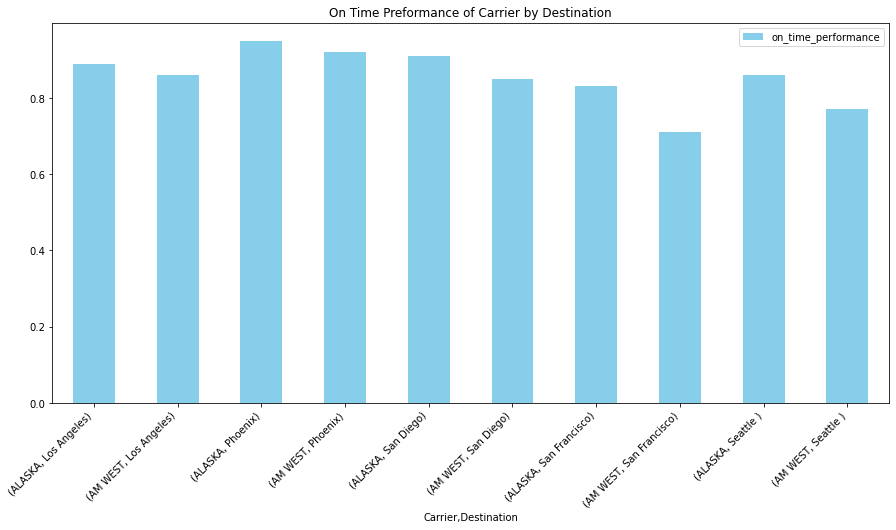

In [242]:
# Call the plot function to create a bar plot of the performance of the carriers by destination
Tidy.plot.bar(y='on_time_performance', title = "On Time Performance of Carrier by Destination", 
              figsize = (15,7), color = 'skyblue')
plt.xticks(rotation=45, horizontalalignment='right')

##### Question a results:
From the above visualization analysis, we can see that ALASKA airline's performance is better than AM WEST's performance in all of the 5 destinations in the dataset.

In [243]:
#b.
# Creating a new DF called Carrier1, that is based on my tidy data but dropping the on_time_performance column
Carrier1 = Tidy.iloc[:, :-1]

# Call the group by function and group the Carrier DF on index level and sum the result
Carrier1 = Carrier.groupby(level=0,axis=0).sum()

# Create a new column in the Carrier DF which includes the total number of flights (on time and delayed) for each carrier
Carrier1['Total_flights'] = Carrier1['delayed'] + Carrier1['on time']

# Save a new calculation to the on_time_performance column which is the proportion of the total flights
# Round the results with 2 decimal points
Carrier1['on_time_performance'] = round(Carrier1['on time']/Carrier1['Total_flights'],2)

# Print result
Carrier1

Flight Schedule,delayed,on time,Total_flights,on_time_performance
Carrier,,,,
ALASKA,501,3274,3775,0.87
AM WEST,787,6438,7225,0.89


##### Question b results:
From the above analysis, we can see that AM WEST airline has better overall on time performance. 

#### Requirement #4 Approach:
- I would not mimic the original wide structure because I think it is not simple to read.
- My hypothesis is that the data would be easier to read on the basis a single observation per destination.
- In order to explore this hypothesis, I will use the Tidy DF and remove the on-time performance in order to focus on my original data and convert it into a wide format by using the unstack() method.

In [244]:
# Creating a new DF called Wide, that is based on my tidy data, but dropping the on_time_performance column
Wide = Tidy.iloc[:, :-1]

# Call the unstack function of the new DF on key column Carrier
Wide = Wide.unstack('Carrier')

# Print results of the wide format
Wide

Flight Schedule delayed         on time        
Carrier          ALASKA AM WEST  ALASKA AM WEST
Destination                                    
Los Angeles          62     117     497     694
Phoenix              12     415     221    4840
San Diego            20      65     212     383
San Francisco       102     129     503     320
Seattle             305      61    1841     201

##### My Reccomendation:
When the data is organized in a wide format, it is easier to compare the airline carriers against the flight schedule because the destination is the variable that is the comparison is being based on, and it is the only data input that is being measured once. In other words, the destination is a unique input, therefore I think that it is best to base the observation on the destination key.